# Explore here

In [26]:
import pandas as pd
df = pd.read_csv('../data/raw/Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [27]:
ts= df.dropna()

In [28]:
ts = ts.set_index('Date')
ts = ts[['Depth_to_Groundwater_P24']]

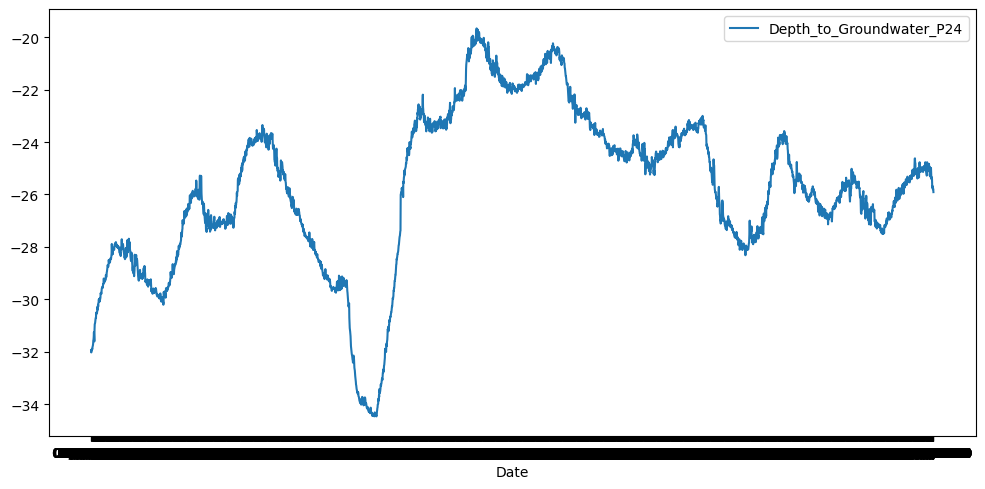

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 365)
decomposition

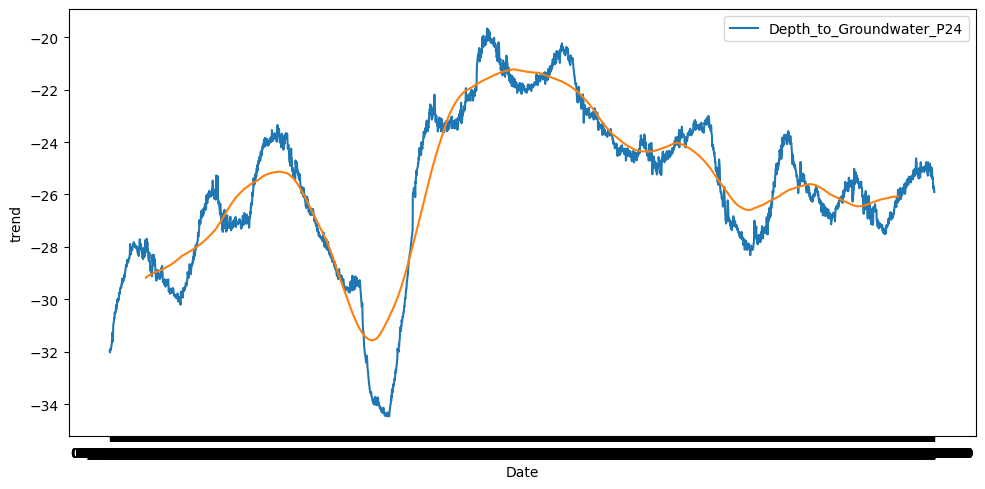

In [31]:
#Análisis de tendencia
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

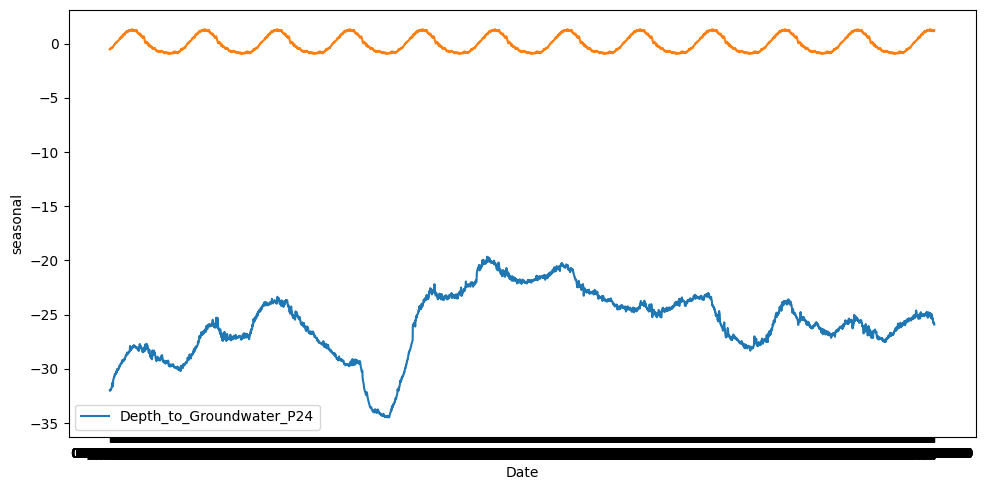

In [32]:
#Análisis de estacionalidad
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [33]:
#Ahora hago el test de mickey fuller para ver si es estacionaria o no
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)
#Es mayor a 0,05 el P value, entonces la serie es no estacionaria
#La serie no es estacionaria, por lo que puedo usar un modelo estadístico para predecirla.

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -2.578036
p-value                           0.097622
#Lags Used                       30.000000
Number of Observations Used    4119.000000
Critical Value (1%)              -3.431939
Critical Value (5%)              -2.862242
Critical Value (10%)             -2.567144
dtype: float64

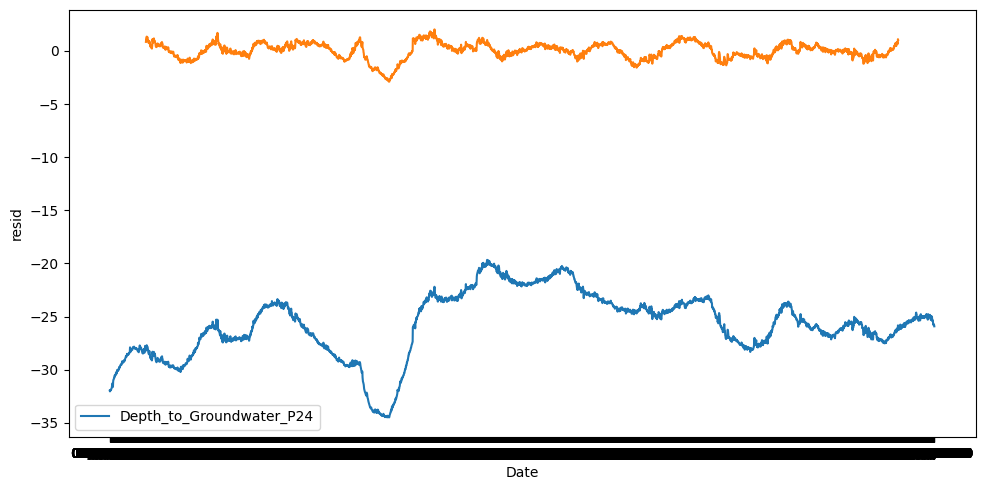

In [34]:
#Análisis de variabilidad
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()
#Candidato a red neuronal por la alta variabilidad.

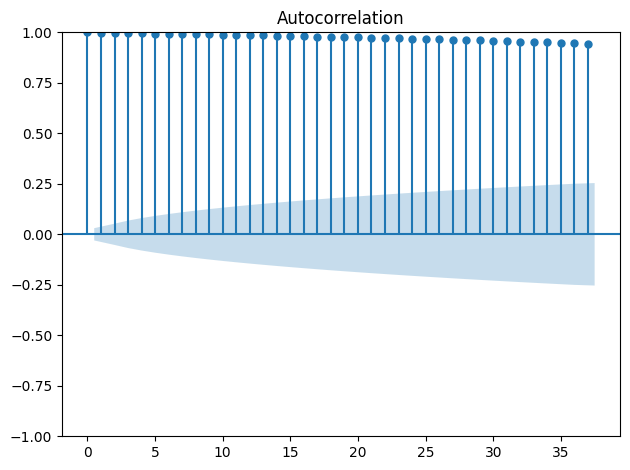

In [35]:
#Análisis de autocorrelación:
#Me dice si la serie de tiempo tiene correlación con una copia retrasada de si misma, es decir si los puntos se correlacionan con su pasado
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()
 
plt.show()

In [36]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal = True, trace = True, m = 12)
#AIC es cantidad de información, esto sirve para saber que el modelo es bueno si el aic es alto.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
model.summary()

In [ ]:
forecast = model.predict(n_periods = 365)
forecast

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast)
 
plt.tight_layout()

plt.show()